# Summary
In this notebook we'll look at the relations between suicide rates and other statistics about countries, such as happiness levels, economic factors, etc.. 

In [1]:
INPUT_FILE = '../data/processed/enriched_df.csv'
META_DATA = '../data/processed/cleaned_meta.csv'
CHOROPLETH_DATA_FILE = '../data/processed/choropleth_df.csv'
RAW = '../data/raw/who_suicide_statistics.csv'

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(CHOROPLETH_DATA_FILE)
df.head()

,year,sex,country,suicides_no,population,"suicides per 100,000",code
0,1979,female,Argentina,508.0,12532000.0,4.05,ARG
1,1979,female,Australia,479.0,6641600.0,7.21,AUS
2,1979,female,Austria,0.0,3742700.0,0.00,AUT
3,1979,female,Bahamas,0.0,95800.0,0.00,BHS
4,1979,female,Barbados,0.0,119800.0,0.00,BRB


In [5]:
meta = pd.read_csv(META_DATA)

meta.head()

fused = pd.merge(df, meta, on="code", how="left")

print(len(fused))
print(len(meta))
print(len(df))

df[df["country"] == "Rwanda"]

codes_meta = meta["code"]
codes_df = df["code"]

# note that there are some codes in our df which had codes which were not in the meta data. For these ones we do
# not have data on income, we'll assume it's "Unknown"
np.setdiff1d(codes_df,codes_meta)  # codes extra for df

fused["income"] = fused["income"].fillna("Unknown")

fused.head()

year = 2014
sample = fused[fused["year"] == year]

sample

7086
263
7086


,year,sex,country,suicides_no,population,"suicides per 100,000",code,region,income
6878,2014,female,Albania,0.0,1350210.0,0.00,ALB,Europe & Central Asia,Upper middle income
6879,2014,female,Anguilla,0.0,NaN,NaN,AIA,NaN,Unknown
6880,2014,female,Antigua and Barbuda,0.0,47455.0,0.00,ATG,Latin America & Caribbean,High income
6881,2014,female,Argentina,687.0,20131806.0,3.41,ARG,Latin America & Caribbean,Upper middle income
6882,2014,female,Armenia,15.0,1473933.0,1.02,ARM,Europe & Central Asia,Upper middle income
...,...,...,...,...,...,...,...,...,...
7081,2014,male,Ukraine,6412.0,18595916.0,34.48,UKR,Europe & Central Asia,Lower middle income
7082,2014,male,United Kingdom,3717.0,29731382.0,12.50,GBR,Europe & Central Asia,High income
7083,2014,male,United States of America,33110.0,146918786.0,22.54,USA,North America,High income
7084,2014,male,Uruguay,460.0,1526566.0,30.13,URY,Latin America & Caribbean,High income


## TODO: make two new columns, one with male_suicide_per_100000 and one with female. Then do scatter plot with male vs female and income as hue

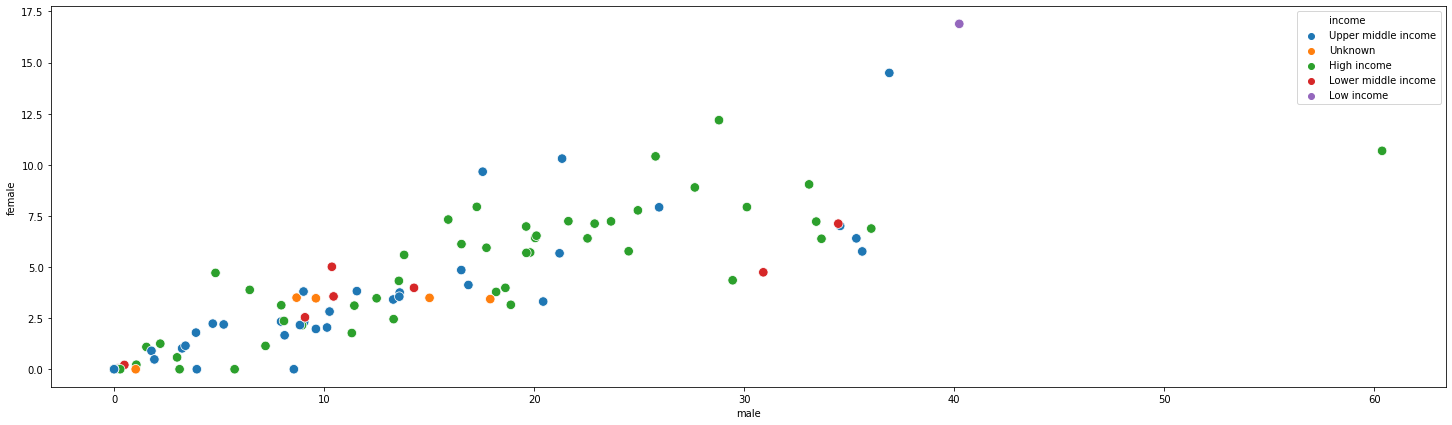

In [6]:
piv = sample.pivot(index="country", columns="sex", values="suicides per 100,000").reset_index()

fused_2 = pd.merge(sample, piv, on="country")

final = fused_2[fused_2["sex"] == "female"].drop(columns="sex")

final.head()

fig = plt.figure(figsize=(25,7))

sns.scatterplot(data=final, x="male", y="female", hue="income", s=90)

### Above plot is not great, maybe skip this alltogether and get nicer meta data!!!

## TODO: 
* Look at top highest suicides per 100,000 and top lowest, show those in plots
* also show the one with biggest difference in male and female suicides
* show plot with map of world, countries coloured in (can use plotly I guess) by how many suicides per 100,000 and can have widget for which year -- would be awesome plot. 
* this would be amazing https://community.plot.ly/t/trouble-with-converting-offline-animation-to-online/19129/2 (choropleth timeseries)
